# Iteration 1 - Data Understanding

## 1. Import Libraries

Load the necessary libraries for data analysis.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

*Libraries used:*
- **pandas** for reading and analyzing the dataset.
- **numpy** for handling numerical operations.
- **matplotlib** for visualizing the data.

## 2. Load Data

Read the CSV file and display its structure.

In [12]:
# Define the path of the CSV file
file_path = "20240606081620_blade1_10m.csv"

# Load the CSV file
df = pd.read_csv(file_path)

In [13]:
# Display the first 5 rows
df.head()

,Time,Left,Right
0,0 sec,0.0,0.0
1,2.2676e-05 sec,0.0,0.0
2,4.5351e-05 sec,0.0,0.0
3,6.8027e-05 sec,0.0,0.0
4,9.0703e-05 sec,0.0,0.0


*Code review:*
- Reads the dataset from a CSV file.
- Displays the first five rows to understand the data structure.

## 3. Display Data Information

Get a summary of the dataset to understand data types and missing values.

In [14]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841592 entries, 0 to 841591
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    841592 non-null  object 
 1   Left    841592 non-null  float64
 2   Right   841592 non-null  float64
dtypes: float64(2), object(1)
memory usage: 19.3+ MB


*Code review:*
- Shows the number of columns, data types, and non-null values.

### **3.1 Check Descriptive Statistics**

View basic statistical metrics of the dataset.

In [15]:
# Display descriptive statistics
df.describe()

,Left,Right
count,8.415920e+05,8.415920e+05
mean,-9.383008e-07,3.074363e-07
std,4.057442e-02,3.902616e-02
min,-9.256264e-01,-8.904691e-01
25%,-2.685629e-03,-2.227851e-03
50%,0.000000e+00,0.000000e+00
75%,2.685629e-03,2.227851e-03
max,1.000000e+00,9.381390e-01


*Code review:*
- Provides metrics like mean, min, max, and quartiles for numerical columns.

### **3.2 Check for Missing Values**

Count the number of missing values in the dataset.

In [16]:
# Check for missing values
df.isnull().sum()

,0
Time,0
Left,0
Right,0


*Code review:*
- Identifies if there are any missing values in the dataset.

## 4. Convert 'Time' Column to Float

Since 'Time' contains string values with " sec", it needs to be cleaned and converted to float.

In [17]:
# Clean and convert 'Time' column
df['Time'] = df['Time'].str.replace(' sec', '', regex=True).astype(float)

*Code review:*
- Removes " sec" from the `Time` column.
- Converts `Time` from string to float for proper numerical analysis.

## 5. Check Dataset After Transformation

Verify the changes made to the dataset.

In [18]:
# Display dataset information after transformation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841592 entries, 0 to 841591
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    841592 non-null  float64
 1   Left    841592 non-null  float64
 2   Right   841592 non-null  float64
dtypes: float64(3)
memory usage: 19.3 MB


*Code review:*
- Ensures that `Time` is now a float data type.

## 6. Check Last Few Rows of the Dataset

Examine the last five rows to get a complete overview.

In [19]:
# Display the last 5 rows
df.tail()

,Time,Left,Right
841587,19.084,0.003754,0.003632
841588,19.084,0.003937,0.003571
841589,19.084,0.003784,0.003418
841590,19.084,0.003784,0.003357
841591,19.084,0.003693,0.003357


*Code review:*
- Helps verify whether any inconsistencies exist at the end of the dataset.

## 7. Visualizing Audio Data

Analyze the data patterns using plots.

### **7.1 Plot Audio Signal (Left & Right Channels)**

Plot the waveform of both audio channels separately and combined.

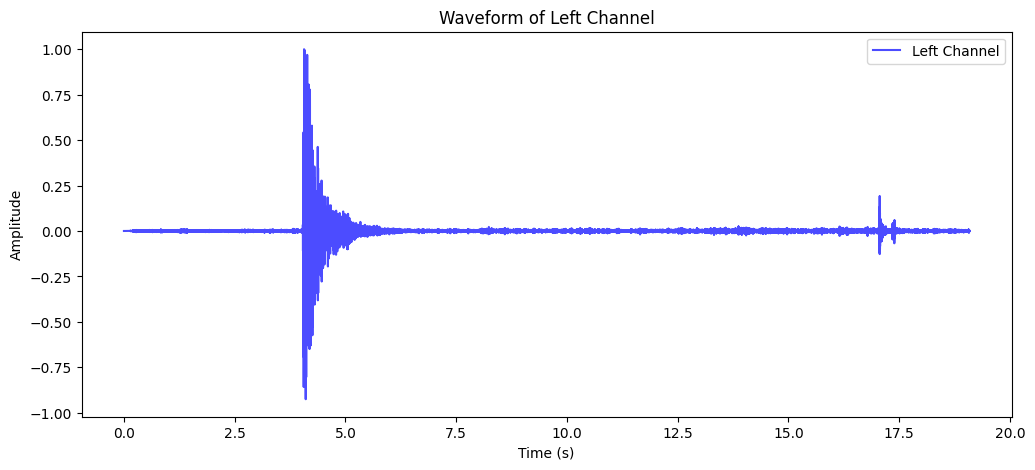

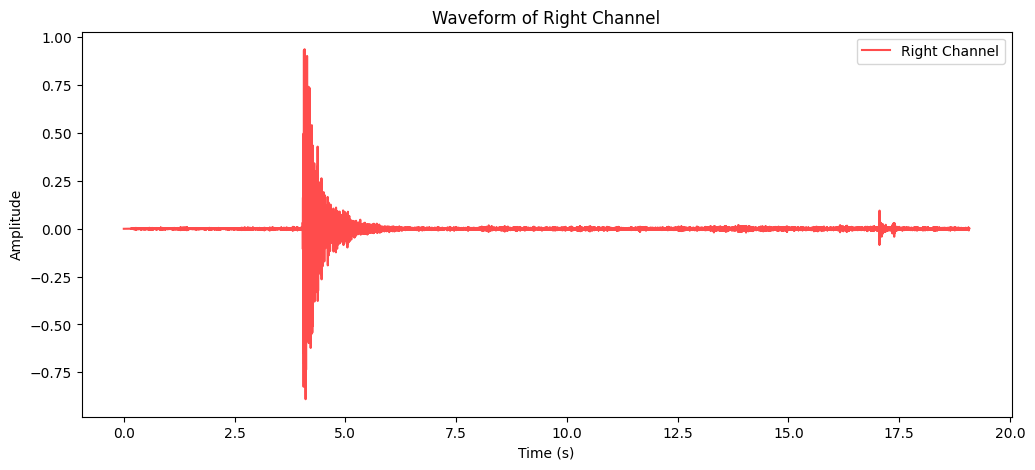

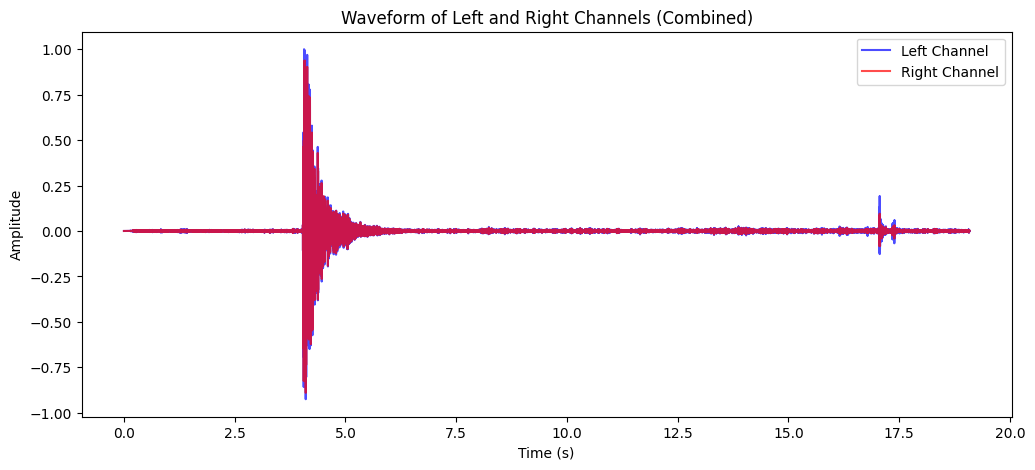

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Left'], label='Left Channel', alpha=0.7, color='blue')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Left Channel')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Right'], label='Right Channel', alpha=0.7, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Right Channel')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['Time'], df['Left'], label='Left Channel', alpha=0.7, color='blue')
plt.plot(df['Time'], df['Right'], label='Right Channel', alpha=0.7, color='red')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform of Left and Right Channels (Combined)')
plt.legend()
plt.show()

*Code review:*
- Displays the waveform of **Left** and **Right** channels separately.
- The combined plot helps in analyzing their relationship over time.

### **7.2 Histogram of Amplitude Distribution**

Visualize the amplitude distribution of both channels separately and combined.

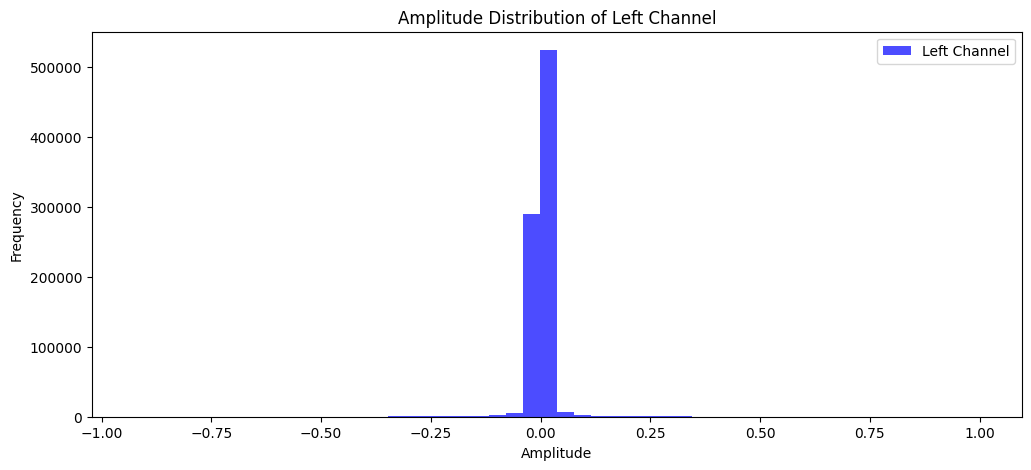

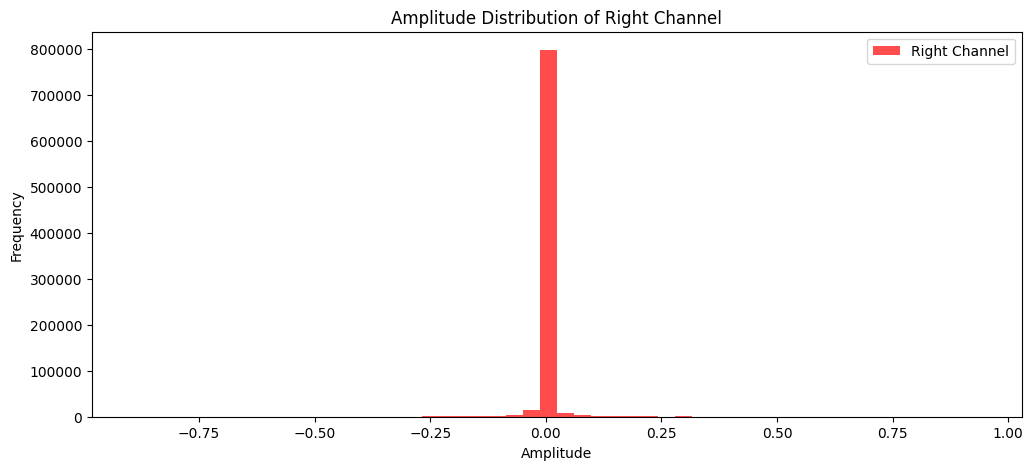

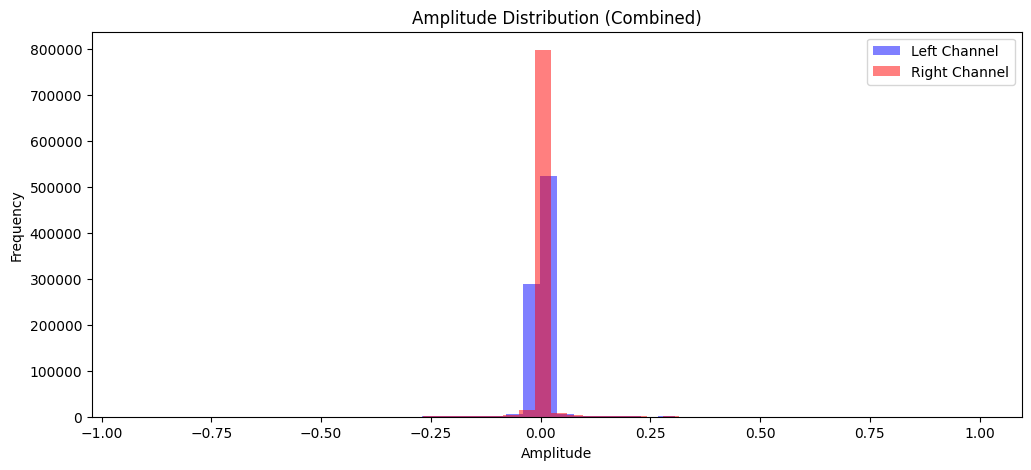

In [23]:
plt.figure(figsize=(12, 5))
plt.hist(df['Left'], bins=50, alpha=0.7, label='Left Channel', color='blue')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Amplitude Distribution of Left Channel')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.hist(df['Right'], bins=50, alpha=0.7, label='Right Channel', color='red')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Amplitude Distribution of Right Channel')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.hist(df['Left'], bins=50, alpha=0.5, label='Left Channel', color='blue')
plt.hist(df['Right'], bins=50, alpha=0.5, label='Right Channel', color='red')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.title('Amplitude Distribution (Combined)')
plt.legend()
plt.show()

*Code review:*
- Displays the amplitude distribution for both **left** and **right** channels.
- Helps identify noise or dominant signals.

## 8. Summary of Data Understanding

From this process, we observed the following:
- **Dataset structure:** Contains `Time`, `Left`, and `Right` columns.
- **Data types:** Initially, `Time` was a string and has now been converted to float.
- **Waveform visualization:** Shows the temporal changes in amplitude for both channels.
- **Amplitude distribution:** Helps analyze the frequency of amplitude values.
- **Missing values:** Checked through `df.info()` to ensure no critical data is missing.